

---


**$$\color{blue}{AML\ 5201- Advanced\ Applications\ of\ Probability\ and\ Statistics - Lab\ Final}\ (50\ Points)$$**

---

 


**Upload your**

1. completed code clearly showing the output cells (.ipynb file)
2. PDF of your completed code (go to file->print->save as PDF choosing Landscape orientation) 

**with the naming convention example** $$\color{red}{AAPS\_LabFinal\_SudarsanAcharya.ipynb}$$ **by clicking [here](https://learnermanipal-my.sharepoint.com/:f:/g/personal/sudarsan_acharya_manipal_edu/EvURWlIawhJKu9cdhxuCttIBjJQo7RcgBiFDkCyzbT8ZVA)**

In [55]:
library(ggplot2)
library(dplyr)

In [56]:
## Refer to this website http://archive.ics.uci.edu/ml/datasets/Auto+MPG
## for the data set that we will modify a bit in the next cell
autompg = read.table(
  "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
  quote = "\"",
  comment.char = "",
  stringsAsFactors = FALSE)

**Question 1: print the structure of the unedited data set. How many samples and features are there?**

In [57]:
str(autompg)

'data.frame':	398 obs. of  9 variables:
 $ V1: num  18 15 18 16 17 15 14 14 14 15 ...
 $ V2: int  8 8 8 8 8 8 8 8 8 8 ...
 $ V3: num  307 350 318 304 302 429 454 440 455 390 ...
 $ V4: chr  "130.0" "165.0" "150.0" "150.0" ...
 $ V5: num  3504 3693 3436 3433 3449 ...
 $ V6: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ V7: int  70 70 70 70 70 70 70 70 70 70 ...
 $ V8: int  1 1 1 1 1 1 1 1 1 1 ...
 $ V9: chr  "chevrolet chevelle malibu" "buick skylark 320" "plymouth satellite" "amc rebel sst" ...


**Here we modify data set; just execute this cell and understand what is happening.**

In [58]:
# Give the dataframe column names
colnames(autompg) = c("mpg", "cyl", "disp", "hp", "wt", "acc", "year", "origin", "name")

# Remove samples with missing horsepower (hp) values represented as "?"
autompg = autompg %>% filter(hp != '?')

# Remove samples with name "plymouth reliant"
autompg = autompg %>% filter(name != 'plymouth reliant')

# Give the dataframe row names in the form based on the engine, year and name
rownames(autompg) = paste(autompg$cyl, "cylinder", autompg$year, autompg$name)

# Select all features except "name"
autompg = autompg %>% select(-name)

# Change horsepower from character to numeric
autompg$hp = as.numeric(autompg$hp)

# Modify origin column to reflect local (1) and international models (0)
autompg = autompg %>% mutate(origin = ifelse(!(origin %in% c(2, 3)), 'local', 'international'))

# Filter samples with 3 and 5 cylinder cars (which are very rare)
autompg = autompg %>% filter(!(cyl %in% c(3, 5)))

# Change cyl and origin columns to factor types
catcols = c('cyl', 'origin')
autompg[catcols] = lapply(autompg[catcols], factor)

**Question 2: print the first 20 rows of the data frame.**

In [59]:
head(autompg, n = 20)

,mpg,cyl,disp,hp,wt,acc,year,origin
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
8 cylinder 70 chevrolet chevelle malibu,18,8,307,130,3504,12.0,70,local
8 cylinder 70 buick skylark 320,15,8,350,165,3693,11.5,70,local
8 cylinder 70 plymouth satellite,18,8,318,150,3436,11.0,70,local
8 cylinder 70 amc rebel sst,16,8,304,150,3433,12.0,70,local
8 cylinder 70 ford torino,17,8,302,140,3449,10.5,70,local
8 cylinder 70 ford galaxie 500,15,8,429,198,4341,10.0,70,local
8 cylinder 70 chevrolet impala,14,8,454,220,4354,9.0,70,local
8 cylinder 70 plymouth fury iii,14,8,440,215,4312,8.5,70,local
8 cylinder 70 pontiac catalina,14,8,455,225,4425,10.0,70,local


**Question 3: print the structure of the modified data frame. How many samples and features are there? Which features are categorical?**

In [60]:
str(autompg)

'data.frame':	383 obs. of  8 variables:
 $ mpg   : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cyl   : Factor w/ 3 levels "4","6","8": 3 3 3 3 3 3 3 3 3 3 ...
 $ disp  : num  307 350 318 304 302 429 454 440 455 390 ...
 $ hp    : num  130 165 150 150 140 198 220 215 225 190 ...
 $ wt    : num  3504 3693 3436 3433 3449 ...
 $ acc   : num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin: Factor w/ 2 levels "international",..: 2 2 2 2 2 2 2 2 2 2 ...


**Question 4: how many levels does the categorical variable *origin* have? What is the reference level?** 

In [61]:
print(levels(autompg$origin))

contrasts(autompg$origin)

[1] "international" "local"        


,local
international,0
local,1


**Question 5: Create a scatter plot of mpg (y-axis) vs. number of cylinders (x-axis).**

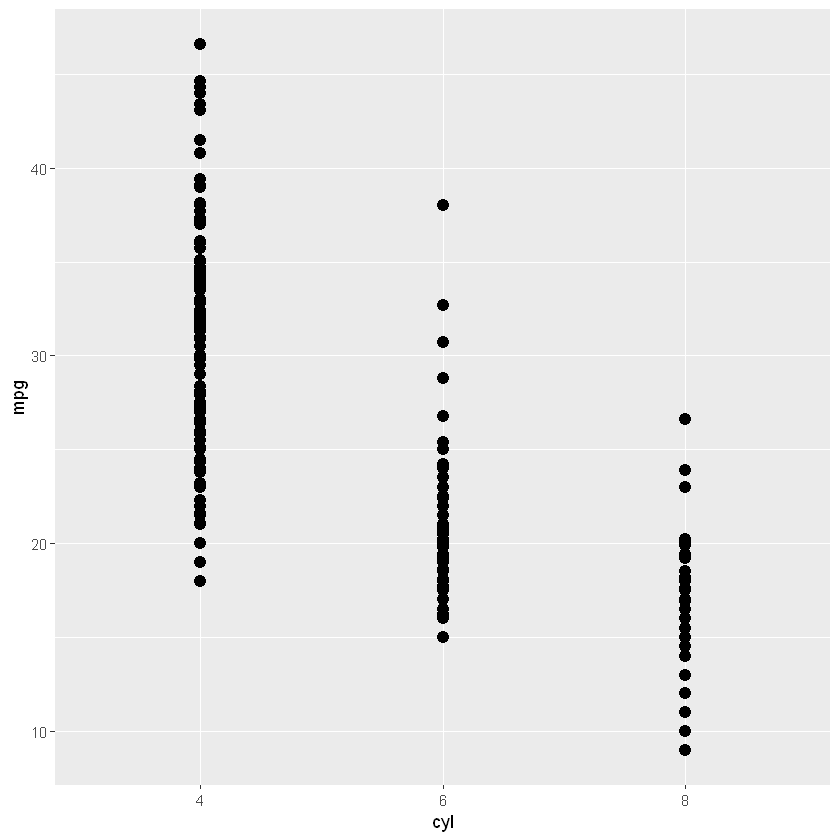

In [97]:
p1 = ggplot(data = autompg, aes(x = cyl, y = mpg)) +
  geom_point(size= 3) 
p1

**Question 6: Create a scatter plot of mpg vs. displacement by color coding the points according to the number of cylinders.**

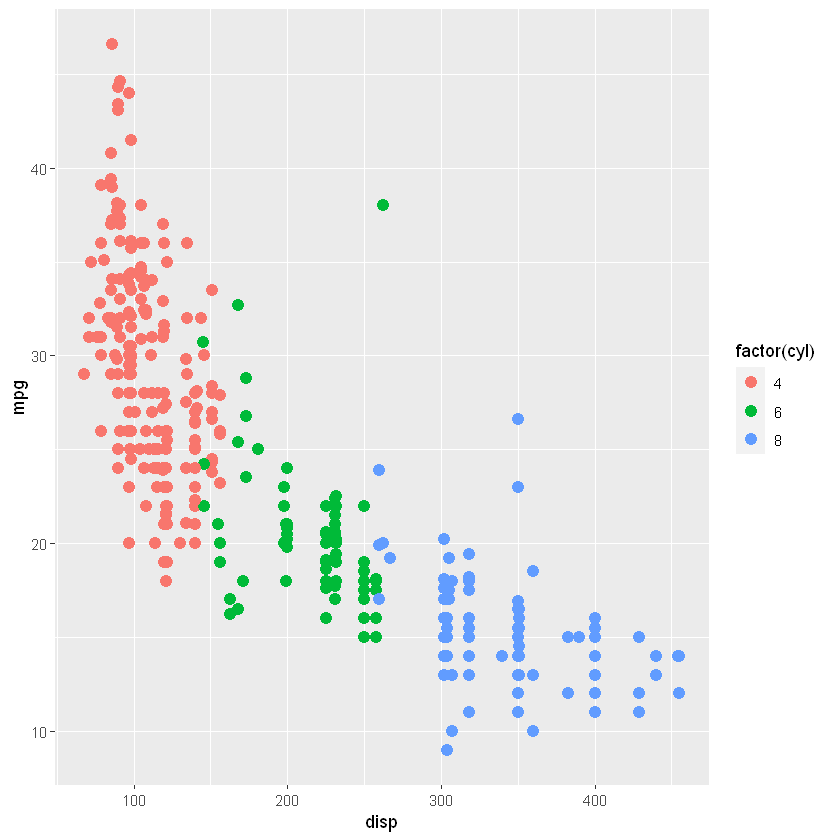

In [98]:
p2 = ggplot(autompg, aes(x = disp, y = mpg, color = factor(cyl))) +
  geom_point(size = 3)
p2

**Question 7: Create a scatter plot of mpg vs. displacement by color coding the points according to the origin (local or international).**

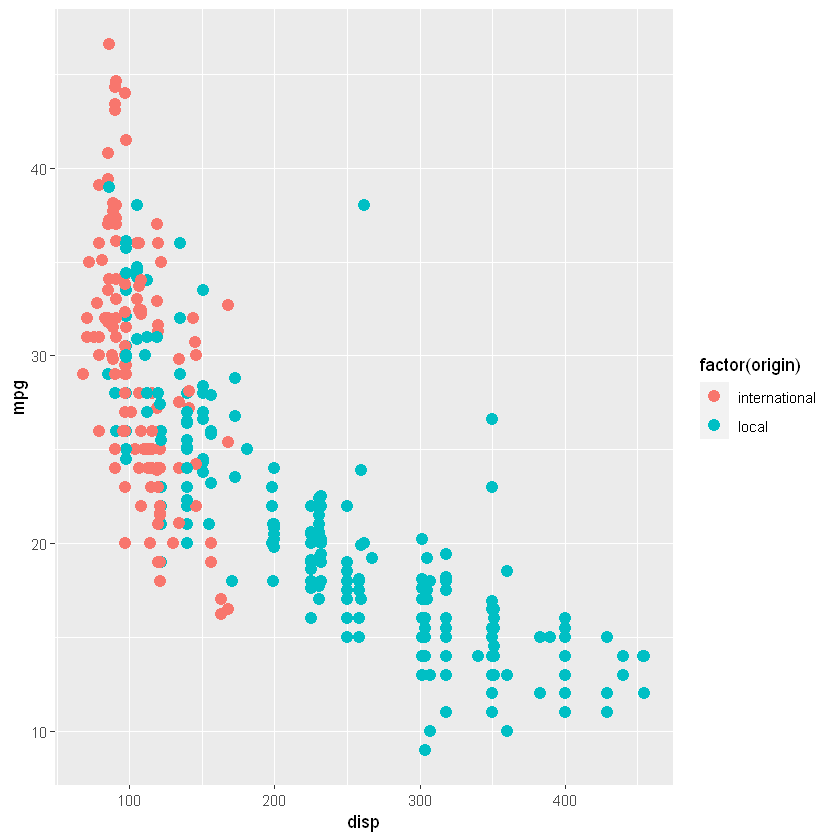

In [91]:
p3 = ggplot(autompg, aes(x = disp, y = mpg, color = factor(origin))) +
  geom_point(size = 3)
p3

**Question 8: fit a linear model for approximating *mpg* as a function of *displacement* and *origin*. Print the model's summary.**

In [92]:
model = lm(data = autompg, mpg ~ disp + origin)
summary(model)


Call:
lm(formula = mpg ~ disp + origin, data = autompg)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.559  -2.904  -0.576   2.434  18.814 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.486645   0.489885  72.439   <2e-16 ***
disp        -0.057251   0.002907 -19.696   <2e-16 ***
originlocal -1.300402   0.632372  -2.056   0.0404 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.506 on 380 degrees of freedom
Multiple R-squared:  0.6721,	Adjusted R-squared:  0.6704 
F-statistic: 389.5 on 2 and 380 DF,  p-value: < 2.2e-16


**Question 9: Extract the slope and intercept for estimating the mpg of local and international categories. It would be helpful to start with the regression equation $\hat{y}^{(i)} = \hat{\beta}_0 + \hat{\beta}_1x_1^{(i)} + \hat{\beta}_2x_2^{(i)}$ and then write two separate equations for local
 and international categories.**

In [88]:
coef(model)['disp']

disp 
-0.05725076

In [94]:
intercept_international = coef(model)['(Intercept)'] # you can also use the $ way of extracting coefficients
intercept_local =  coef(model)['(Intercept)'] + coef(model)['originlocal']

slope_international = coef(model)['disp']
slope_local = coef(model)['disp']

yInternational = intercept_international + slope_international * autompg$disp
yLocal = intercept_local + slope_local * autompg$disp

**Question 10: to the scatter plot you created for mpg. vs displacement color coded using origin, add two separete regression lines for local and domestic cars.**

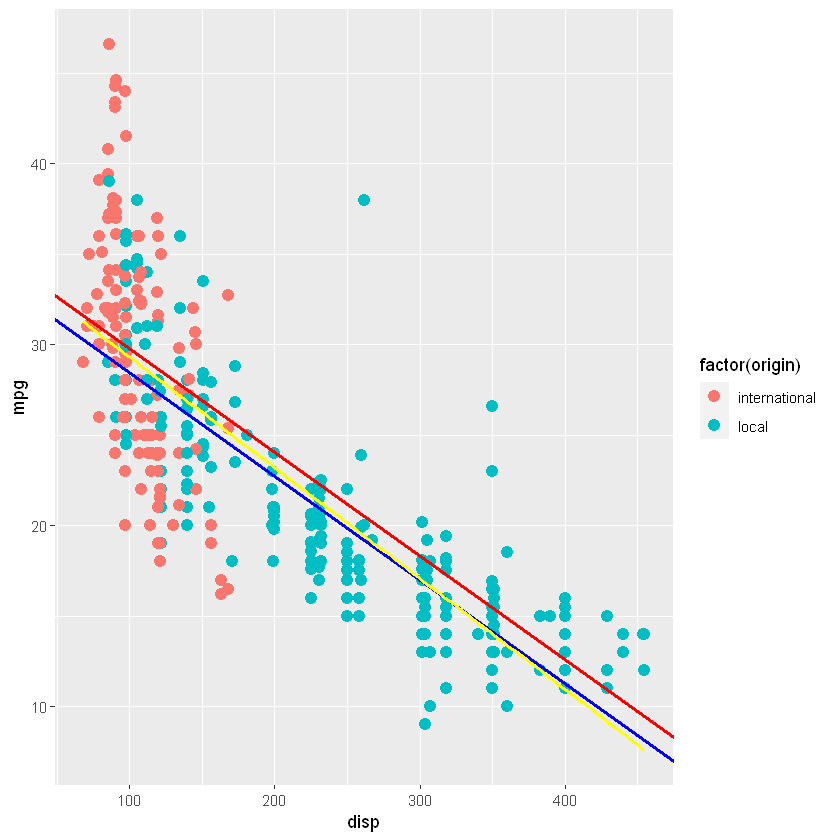

In [95]:
p3 %+% geom_abline(intercept = coef(model)['(Intercept)'], slope = coef(model)['disp'], color = 'red', size = 1, linetype = 1) +
   geom_abline(intercept = intercept_local, slope = slope_local, color = 'blue', size = 1, linetype = 1) +
   geom_smooth(method = lm, formula = y ~ x, color = 'yellow', se = FALSE)
  

**Question 11: Fit a linear model for mpg as a function of displacement and origin including an interaction effect between the predictors. Print the summary of the model.**

In [68]:
model = lm(data = autompg, mpg ~ disp + origin + disp * origin)
summary(model)


Call:
lm(formula = mpg ~ disp + origin + disp * origin, data = autompg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8332  -2.8956  -0.8332   2.2828  18.7749 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       46.05484    1.80582  25.504  < 2e-16 ***
disp              -0.15692    0.01668  -9.407  < 2e-16 ***
originlocal      -12.57547    1.95644  -6.428 3.90e-10 ***
disp:originlocal   0.10252    0.01692   6.060 3.29e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.308 on 379 degrees of freedom
Multiple R-squared:  0.7011,	Adjusted R-squared:  0.6987 
F-statistic: 296.3 on 3 and 379 DF,  p-value: < 2.2e-16


**Question 12: Extract the slope and intercept for estimating the mpg of local and international categories. It would be helpful to start with the regression equation $\hat{y}^{(i)} = \hat{\beta}_0 + \hat{\beta}_1x_1^{(i)} + \hat{\beta}_2x_2^{(i)} + \hat{\beta}_3x_3^{(i)}$ and then write two separate equations for local and international categories. In this equation, $x_3^{(i)}$ is the interaction effect variable.**

In [69]:
intercept_international1 =  coef(model)[1]
intercept_local1 = coef(model)[1] + coef(model)[3]

slope_international1 = coef(model)[2]
slope_local1 = coef(model)[2] + coef(model)[4] 

yInternational1 = intercept_international + slope_international1 * autompg$disp
ylocal1 = intercept_local1 + slope_local1 * autompg$disp

**Question 13: Create a scatter plot of mpg vs. displacement by color coding the points according to the origin (domestic or international), and add separate regression lines for international and local cars.**

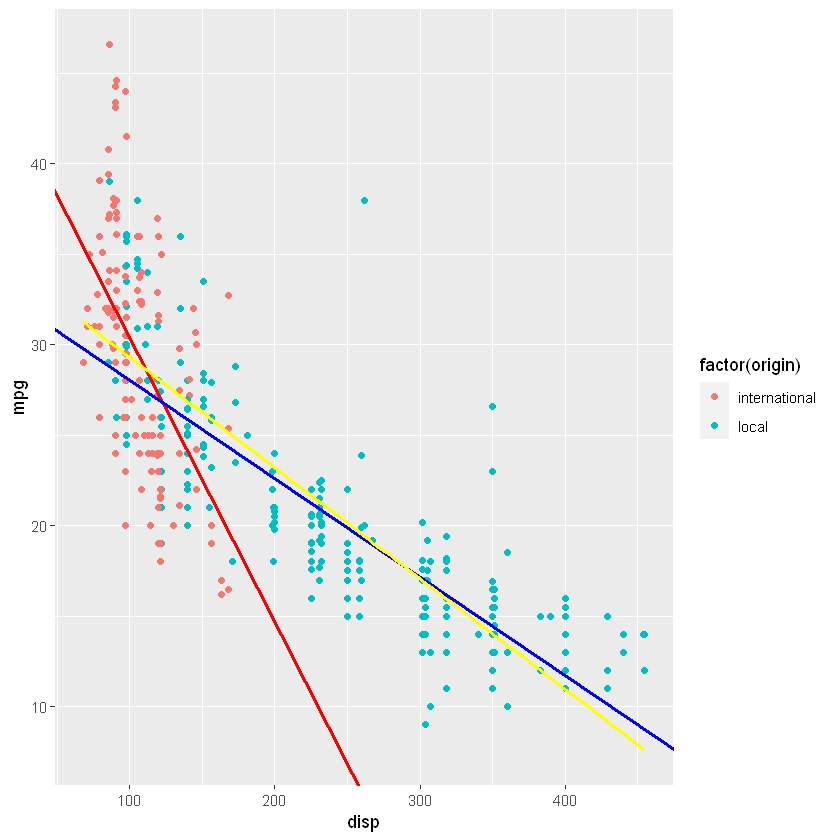

In [96]:
p4 = ggplot(data = autompg, aes(x=disp, y = mpg, color = factor(origin))) +
  geom_point() +
  geom_abline(intercept = intercept_international1, slope = slope_international1, color = 'red', size = 1, linetype = 1) +
  geom_abline(intercept = intercept_local1, slope = slope_local1, color = 'blue', size = 1, linetype = 1) +
  geom_smooth(method = lm, formula = y ~ x, color = 'yellow', se = FALSE)
p4

**Question 14: Fit a linear model for mpg as a function of *displacement* and *hp*. Print the model's summary.**

In [71]:
model1 = lm(data = autompg, mpg ~ disp + hp)

**Question 15: predict the mpg of a car with displacement = 375 and hp = 175.**

In [72]:
newautompg = data.frame(disp = c(375), hp = c(175))
predict(model1, newautompg)

1 
12.0124

**Question 16: Fit a linear model for *mpg* as a function of *displacement* and *hp* including an interaction term between the predictors. Print the model's summary.**

In [73]:
model2 = lm(data = autompg, mpg ~ disp + hp + disp * hp)
summary(model2)


Call:
lm(formula = mpg ~ disp + hp + disp * hp, data = autompg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7849  -2.3104  -0.5699   2.1453  17.9211 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.241e+01  1.523e+00   34.42   <2e-16 ***
disp        -1.002e-01  6.638e-03  -15.09   <2e-16 ***
hp          -2.198e-01  1.987e-02  -11.06   <2e-16 ***
disp:hp      5.658e-04  5.165e-05   10.96   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.896 on 379 degrees of freedom
Multiple R-squared:  0.7554,	Adjusted R-squared:  0.7535 
F-statistic: 390.2 on 3 and 379 DF,  p-value: < 2.2e-16


**Question 17**: using the interaction model, predict the mpg of a car with displacement = 375 and hp = 175.

In [74]:
predict(model2,newautompg)

1 
13.50693

**Queestion 18**: Using both non-interaction and interaction models, predict the mpg of a car with displacement = 400, hp = 250.

In [75]:
newautompg = data.frame(disp = c(400), hp = c(250))
predict(model1, newautompg)
predict(model2, newautompg)

1 
7.433853

1 
13.96639